# Week 6 - Intro to Machine Learning: Dimensionality Reduction and Deep Learning


# Evaluating Model Performance
Evaluating a machine learning model allows us to assess its effectiveness in solving a particular problem. It helps us answer questions like:

1. Is the model accurate enough to make reliable predictions?
2. What is the best way to determine model accuracy?
3. Does it generalize well to unseen data?
4. How does it compare to other models or benchmarks?
5. What are the limitations and weaknesses of the model?

By obtaining answers to these questions, we can refine and improve our models, ensuring they deliver meaningful insights.

When evaluating a machine learning model, it is essential to choose appropriate evaluation metrics. The choice of metric depends on the problem at hand and the nature of the data. The selected metrics depends on if we are looking at a classification task or regression task.

An important aspect of evaluating models is identifying whether it is overfitting or udnerfitting, enabling us to adjust the models accordingly. Overfitting occurs when a regression model fits the training data too closely, leading to poor performance on unseen data. On the other hand, underfitting refers to a model that doesn’t capture the underlying patterns in the data.

## Training and Test Data Split
One of the first key pre-modelling features to implement is splitting the data into two subsets; training and testing. The model is trained on the training set, and its performance is evaluated on the test set. This approach provides an estimate of how well the model performs on new, unseen data.

To ensure a fair evaluation, it is important to randomly shuffle the data before splitting it into training and test sets. This helps prevent any biases that might be present in the original ordering of the data. However, if you shuffle time series data this may cause errors in model training. Instead it is better to use time-series cross validation, which we will look at in more detail below.

Using a train test split in unsupervised learning tasks is not a common practice. This is because the test data is used to see how well the model fit to what we expect. Because unsupervised learning does not have a set expected output it is challenging to evaluate its performance based on a test set.

### Training, Validation and Test Data Split
In some cases you may have a training, validation and test data split. The validation dataset is used as a data set to tune the model hyper parameters. Tuning will finish when the optimum set of hyper parameters has been found by minimising losses on the validation set. After this, the test set is used as a completely unseen set of data to evaluate the model to prevent any bias. 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

x, y = make_regression(n_samples = 10000, n_features = 4, n_informative = 4)


x_train, x_test, y_train, y_test = train_test_split(x,y,shuffle=True)


[ 64.45980578 -65.31326868   8.92828045 ... -76.94365663  30.27521413
 131.83883067]


## Cross Validation

### Time-Series Cross Validation

## Classification Metrics and Visualisations

### Confusion Matrices
![confusionmatrix](img/ConfusionMatrices.png)

### Metrics
#### 1. Accuracy: 
**"How many of our predictions were correctly labelled"**. A percentage calculated from number of correct predictions divided by total predictions. Maximise towards 1. Only works best for balanced classes, with inbalanced classes it is biased towards the class with more samples.

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

#### 2. Precision: 
**"How many of the samples predicted as positive are actually positive"**. A percentage of true positives divided by all positives predicted. Maximise towards 1. A high score means the samples we have labelled as positives are actually positives. Maximising precision minimises the false-positive errors.

$$
Precision = \frac{TP}{TP + FP}
$$


#### 3. Recall (Also known as True Positive Rate): 
**"How many of our actual positive samples were correctly labelled as positive"**. A percentage of true positives divided by the sum of ground truth positives. Maximise towards 1. A high score means actual positives have been labelled correctly as positive. Maximising recall minimises the false-negative errors. 

$$
Recall = \frac{TP}{TP + FN}
$$

#### 4. Fasle Positive Rate (FPR):
**""How many of our actual negative samples were incorrectly labelled as positive""**. The percentage of false positives divided by the sum of ground truth negatives. Minimise towards 0. A high score means actual negatives have been labelled as positive.

$$
FPR = \frac{FP}{FP + TN}
$$

#### 5. F1 Score: 
Harmonic mean of the precision and recall. High F1 means high precision and recall. Low score means that among the samples predicted as positive, not many were actually positive. Gives good results on imbalanced classification problems. Does not give information on what type of error. It is used to maximise both precision and recall at the same time (maximise towards 1).

$$
F1 = \frac{2}{\frac{1}{Precision}+ \frac{1}{Recall}}
$$

#### 6. Fbeta: 
Harmonic mean of precision and recall where more attention is put on one depending on the beta value. 
- F0.5: More weight on precision, less on recall. Used when trying to minimise false positives.
- F1.0: Balanced weight. Used when both scores are important.
- F2.0: More weight on recall, less on precision. Used when trying to minimise false negatives.

$$
Fbeta = \frac{(1+\beta^{2}) * Precision * Recall}{\beta^{2}* Precision + Recall}
$$






### Precision-Recall Curves

Mainly used for binary classification problems. Can be extended to multiclass classification, but not as intuitive

TALK ABOUT THE DIFFERENCES BETWEEN PR AND ROC CURVE WHEN IT COMES TO CLASS INBALANCE.

https://www.askpython.com/python/examples/precision-recall-curve-python-model-evaluation

Precision: 0.7659574468085106
Recall: 0.6


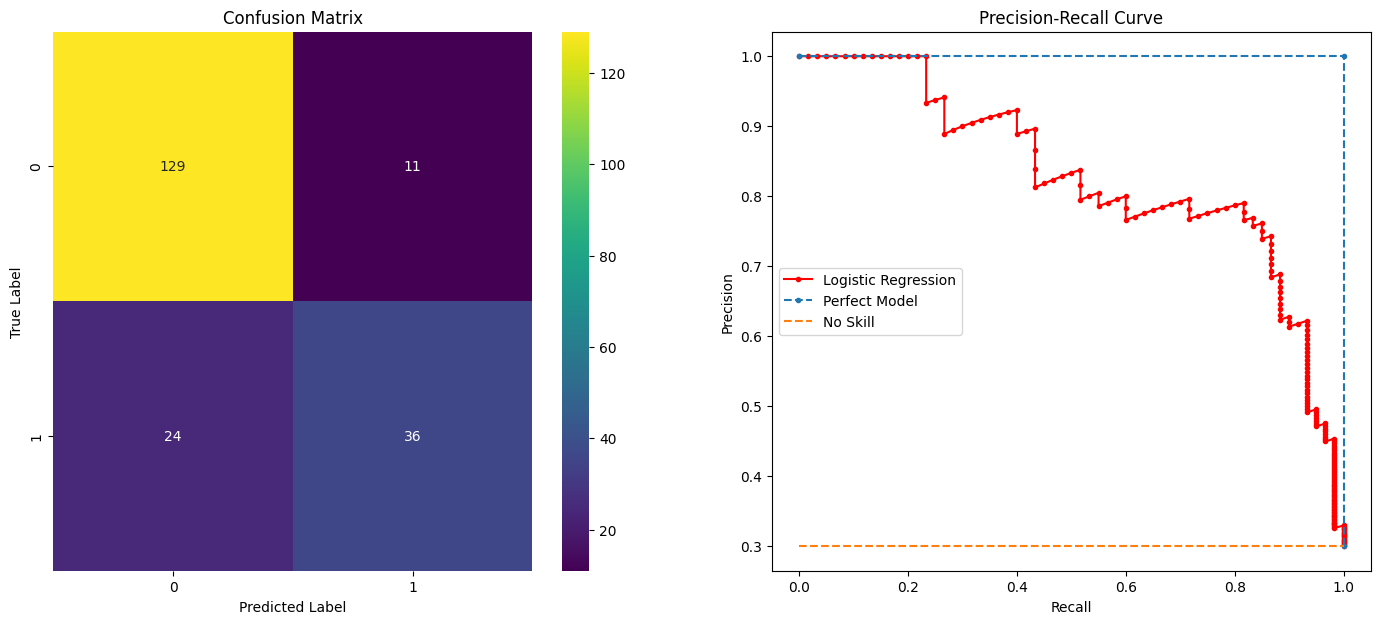

In [2]:
#importing required modules
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

Pos_Weight = 0.7
Neg_Weight = 0.3

# Generating synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[Pos_Weight, Neg_Weight], random_state=42)
 
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Training a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
 
# Predicting probabilities of positive class
y_probs = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)
 
# Calculating precision score
precision = precision_score(y_test, y_pred)
 
# Calculating recall score
recall = recall_score(y_test, y_pred)
 
print("Precision:", precision)
print("Recall:", recall)
 
# Predicting classes based on the probability threshold of 0.5
y_pred_thresh = (y_probs > 0.5).astype(int)
 
# Computing confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Perfect Model
perfect_recall = [0,1,1]
perfect_precision = [1,1,Neg_Weight]
# No Skill
no_skill_recall = np.linspace(0,1,len(y_test))
no_skill_precision = np.full(len(y_test),Neg_Weight)

# Ploting the confusion matrix
plt.figure(figsize=(17, 7))
plt.subplot(1,2,1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Computing precision-recall pairs
precision, recall, _ = precision_recall_curve(y_test, y_probs)
 
plt.subplot(1,2,2)
# Ploting precision-recall curve
plt.plot(recall, precision, marker='.', color='red', label="Logistic Regression")
plt.plot(perfect_recall, perfect_precision, marker='.', linestyle="dashed" , label="Perfect Model")
plt.plot(no_skill_recall,no_skill_precision, linestyle="dashed", label = "No Skill")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


### Receiver Operating Characteristic (ROC) Curves

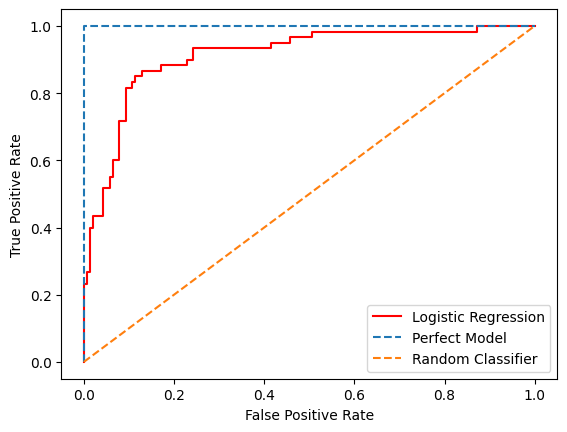

In [8]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_probs)

roc_auc = auc(false_positive_rate,true_positive_rate)

#Random Classifier
random_fpr = np.linspace(0,1,len(false_positive_rate))
random_tpr = np.linspace(0,1,len(false_positive_rate))

#Perfect Model
perfect_fpr = [0,0,1]
perfect_tpr = [0,1,1]

plt.plot(false_positive_rate, true_positive_rate,label="Logistic Regression", color="red")
plt.plot(perfect_fpr, perfect_tpr, label = "Perfect Model", linestyle="dashed")
plt.plot(random_fpr,random_tpr, label="Random Classifier", linestyle="dashed")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

[0.         0.         0.         0.00714286 0.00714286 0.01428571
 0.01428571 0.02142857 0.02142857 0.04285714 0.04285714 0.05714286
 0.05714286 0.06428571 0.06428571 0.07857143 0.07857143 0.09285714
 0.09285714 0.10714286 0.10714286 0.11428571 0.11428571 0.12857143
 0.12857143 0.17142857 0.17142857 0.22857143 0.22857143 0.24285714
 0.24285714 0.41428571 0.41428571 0.45714286 0.45714286 0.50714286
 0.50714286 0.87142857 0.87142857 1.        ]


## Regression Metrics and Visualisations

### Metrics
These metrics quantify the model’s ability to predict continuous values accurately. You can not calculate the accuracy of regression models as you would classification models. Instead, you calculate the error of the predictions, also known as residuals. A residual is the difference between the actual value and the predicted value. 

<center>
<img src="https://lh4.googleusercontent.com/JyWJqWbIukHV02CkLI5WvzpfQGdJjYtLshg7GypE0eBUmjkJ3xlFsEhWc5oXMIo3i-FCaBaG3RdUg3Bh-2td6JSnwyOgalWUlKd2BM6x5gYNyKfD5nKmq7LkthCRN3GBKkquMK4BOBoVmYgiQnF9tCY" width="500"/>
</center>

There are many different ways to calculate the error on your predictions, below are some of the most common. 
Some common notations to cover:

- $y_{i}$ The actual values, also known as target, independent or response values
- $\hat{y_{i}}$ - The predicted values
- $\bar{y_{i}}$ - The mean of our actual values
- $N$ - Number of samples



#### 1. Mean Squared error (MSE):
MSE is calculated as the mean of the squared differences between predicted and actual values in a dataset. Squaring the difference has the effect of creating only positive error values, as well as inflating larger errors. This has the effect of 'punishing' models more for larger errors. A good MSE is relative to the dataset, so care needs to be taken on how the error is interpreted. The units of MSE are squared units, this can be quite confusing if for example our target value is kW, then our MSE would be kW squared. Therefore, root mean squared error (RMSE) can be used instead. 

$$
MSE = \frac{1}{N}\sum_{i=1}^{N}(y_{i}-\hat{y_{i}})^{2}
$$

We can see in the plot below with a decreasing predicted value where the actual value is 1, our MSE goes up exponentially.


<center>
<img src="https://machinelearningmastery.com/wp-content/uploads/2020/12/Line-Plot-of-the-Increase-Square-Error-with-Predictions.png" width="700"/>
</center>


#### 2. Root Mean Squared Error (RMSE):
RMSE is an extension of MSE, where the result is square rooted so that the units of RMSE are the same as the original data. Doing so also ensures that the resultant error remains positive, but also punishes larger errors less than MSE. Therefore, it is sometimes the practice to use MSE to train regression and then use RMSE to evaluate and repot the performance. Similar to MSE, a good RMSE value is relative to your dataset. 

$$
RMSE = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(y_{i}-\hat{y_{i}})^{2}}
$$

#### 3. Mean Absoute Error (MAE):
MAE is calculated as the average of the absolute error. Like RMSE, the units of MAE match the original data. However, unlike RMSE and MSE the changes in MAE are linear. This means that MAE does not inflate the errors but instead the scores increase linearly with increase in error. Again, a good MAE value is relative to your specific dataset.

$$
MAE = \frac{1}{N}\sum_{i=1}^{N}\left|y_{i}-\hat{y_{i}}\right|
$$

#### 4. Mean Absolute Percentage Error (MAPE):
MAPE is popular on the reporting side as it is expressed as a percentage whcih makes it esaier to interpret. This makes it scale independent so it can be used to compare predictions on different scales. MAPE is undefined when the actuals are zero, and can be very extreme when very close to zero. It is also asymmetric and puts heavier penalty on negative errors (when predictions are higher than actuals) than on positive errors. Therefore optimising for MAPE will favour models that underpredict rather than overpredict. If you wish to use MAPE for your optimisation or evaluation it may be worth doing some further investigation before hand wether this is the most optimum metric to use. 

$$
MAPE = \frac{1}{N}\sum_{i=1}^{N}\left| \frac{y_{i}-\hat{y_{i}}}{y_{i}} \right|
$$


##### 5. Other Error Metrics:
There are quite a few other error metrics worth exploring in more detail.

- Relative RMSE (RRMSE): Normalises the RMSE by the mean of the observations. 
- Root Mean Squared Relative Error (RMSRE): <font color='red'>Add one sentence describing how this metric differs from normal RMSE. do the same for the other ones below</font>
- Standardised RMSE (SRMSE):
- Mean Squared reduced Error (MSRE):
- Relateive MAE (RMAE): 
- Symmetric MAPE (sMAPE):

#### 6. R-squared (R2):
Also known as the coefficient of determiniation, representes the proportion of variance explained by a model. Another way of saying this is:

**"How much of a change in the target variable can be explained by the features"**

$$
R^{2} = 1- \frac{RSS}{TSS} = 1 - \frac{\sum_{i=1}^{N}(y_{i}-\hat{y_{i}})^{2}}{\sum_{i=1}^{N}(y_{i}-\bar{y_{i}})^{2}}
$$

- Residual Sum of Squares (RSS): This is the sum of squared residuals. This captures the prediction error of a model.
- Total Sum of Squares (TSS): This is the sum of squared residuals of a simple model that is just the mean of our actual values. TSS is the variance that a simple mean model can not explain. 

You are comparing the fit of a model to that of a simple mean model. The closer the value is to 1, the better our model is performing. 

<center>
<img src="https://lh4.googleusercontent.com/RkCU8UUjDqiCvcm9nUy7cDteIfWh5jVirD_VIFFbNYBrK5I7zBKtbnRXwvwo8RNjzlfsqH-beEpXFyBkn5MSJpxZi0jFwOF6EjLqeTKrc7wME3FtKctGavPj_hLuAbL3HsY2NhMC3Wj6jO7liwDqLgo" width="700"/>
</center>

An important limitation about R-squared is that it assumes that every feature helps explain the variation in the target. For this reason, if you continue adding features to a linear model estimated using ordinary least squares (OLS), the value of R-squared with either remain unchanged or increase, it will never decrease. A solution to this problem is the adjusted R-squared.

#### 7. Adjusted R-Squared: 
Very similar to R-squared, adjusted R-squared additionally penalises adding features that are not useful for predicting the target. The value of the adjusted R-squared decreases if the increase in R-squared caused by adding new features is not significant enough. 

$$
Adjusted\ R^{2} = 1 - \frac{(1 - R^{2})(N - 1)}{N - p - 1}
$$
Where:
- $R^{2}$ is sampled R-squared
- $N$ is Total sample size
- $p$ is number of independent variables






### Hypothesis-Based Metrics:
Each of the following metrics is based on an initial hypothesis (called the null hypothesis) about the regression model. The metric gives a probability of how correct the null hypothesis is. In most cases if the probability is less than 5% then the null hypothesis is rejected. 

##### 8. P>|z|:
Tests whether or not a coefficient has an impact on the linear regression prediction. The null hypothesis is that there is no relationship between the predictor and response variables. If we get a value less than 0.05 then the null hypothesis is rejected, meaning there is a relationship between that predictor variable and the response variable. The P>|z| can be used to remove features from the model that do not have a large enough impact on the resposne variable.

#### 9. F-test:
Explains whether the regression model as a whole explains a significant amount of the variation in the dependent variable. The null hypothesis is that the response variable cannot be represented as a function of any of the predictor variables. The f-test value will be maximised and the p-value minimised. 

#### 10. Ljung-Box (Q):
Tests whether the errors from our fitted model are white noise, or whether there is still some underlying pattern. If there is still some underlying pattern in the errors then we can say that the model has not found the best fit with the features available. The null hypothesis is that the model shows no lack in fit (simply, the model has a good fit). Therefore, it is desirable to get a probability >5% to accept our null hypothesis, meaning our model has a good fit and the residuals are independently distributed. 

The middle plot uses something called the Autocorrelation Function (ACF), you can read up more about this [here](https://www.geeksforgeeks.org/autocorrelation/)

<center>
<img src="https://www.researchgate.net/profile/Younsook-Yeo/publication/309905822/figure/fig6/AS:427296717840397@1478886884466/Figure-9-Ljung-Box-Test-ARI-1-1-Model.png
" width="700"/>
</center>

#### 11. Heteroscedasticity (H):
Heteroscedasticity refers to the unequal scatter of residuals over the range of the measured values. Heteroscedasticity is a problem beacuse ordinary least squares regression is under the assumption that the residuals are drawn from a population that has a constant variance and is uniformly distributed (homoscedasticity). The null hypothesis of this test (known as the Breusch-Pagan test) is that homoscedasticity is present meaning the residuals are distributed with equal variance. If we fail the hypothesis, heteroscedasticity is present. Therefore, the objective is to accept the null hypothesis and get a probability >5%. If heteroscedasticity is present, one solution is to transform the target variable. This could be through using the log or exponential of the target variable.
<center>
<img src="https://fourpillarfreedom.com/wp-content/uploads/2019/02/het2.jpg" width="700"/>
</center>

#### 12. Jarque-Bera (JB):
This test is used to determine if a dataset follows a normal distribution. The test works by calculating the skewness and kurtosis of the dataset, which are measures of the shape of the distribution. Normality in a dataset is important because many statistical methods assume that the data is normally distributed for accurate conclusions and predictions. The null hypothesis is that the data is normally distributed, a probability >5% means the null hypothesis is accepted, and it can be said that the data is normally distributed.
<center>
<img src="https://www.researchgate.net/publication/285956550/figure/fig2/AS:1023600534499334@1621056793778/Normality-Test-of-Jarque-Bera-Gretl.jpg" width="700"/>
</center>


### Regression Visualisations

In [101]:
import pandas as pd
data = pd.read_csv("data/Student_Performance.csv")

data.rename(columns={"Hours Studied":"hrs_studied",
             "Previous Scores":"prev_score",
             "Sleep Hours":"sleep",
             "Sample Question Papers Practiced":"practice",
             "Performance Index":"performance", 
             "Extracurricular Activities":"activities"}, inplace=True)

mapping = {"Yes":1, "No":0}
data["activities"] = data["activities"].map(mapping)



####

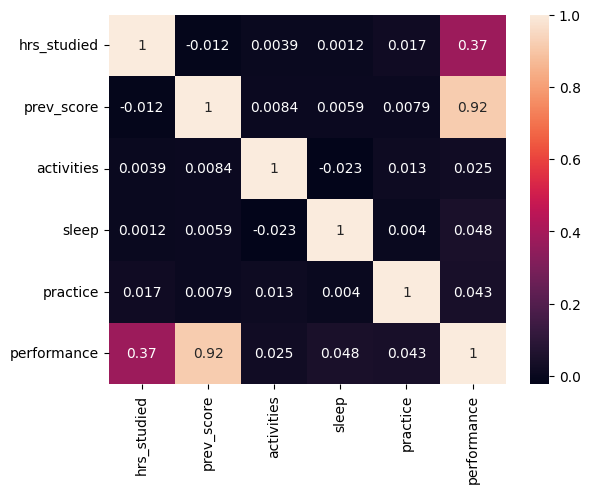

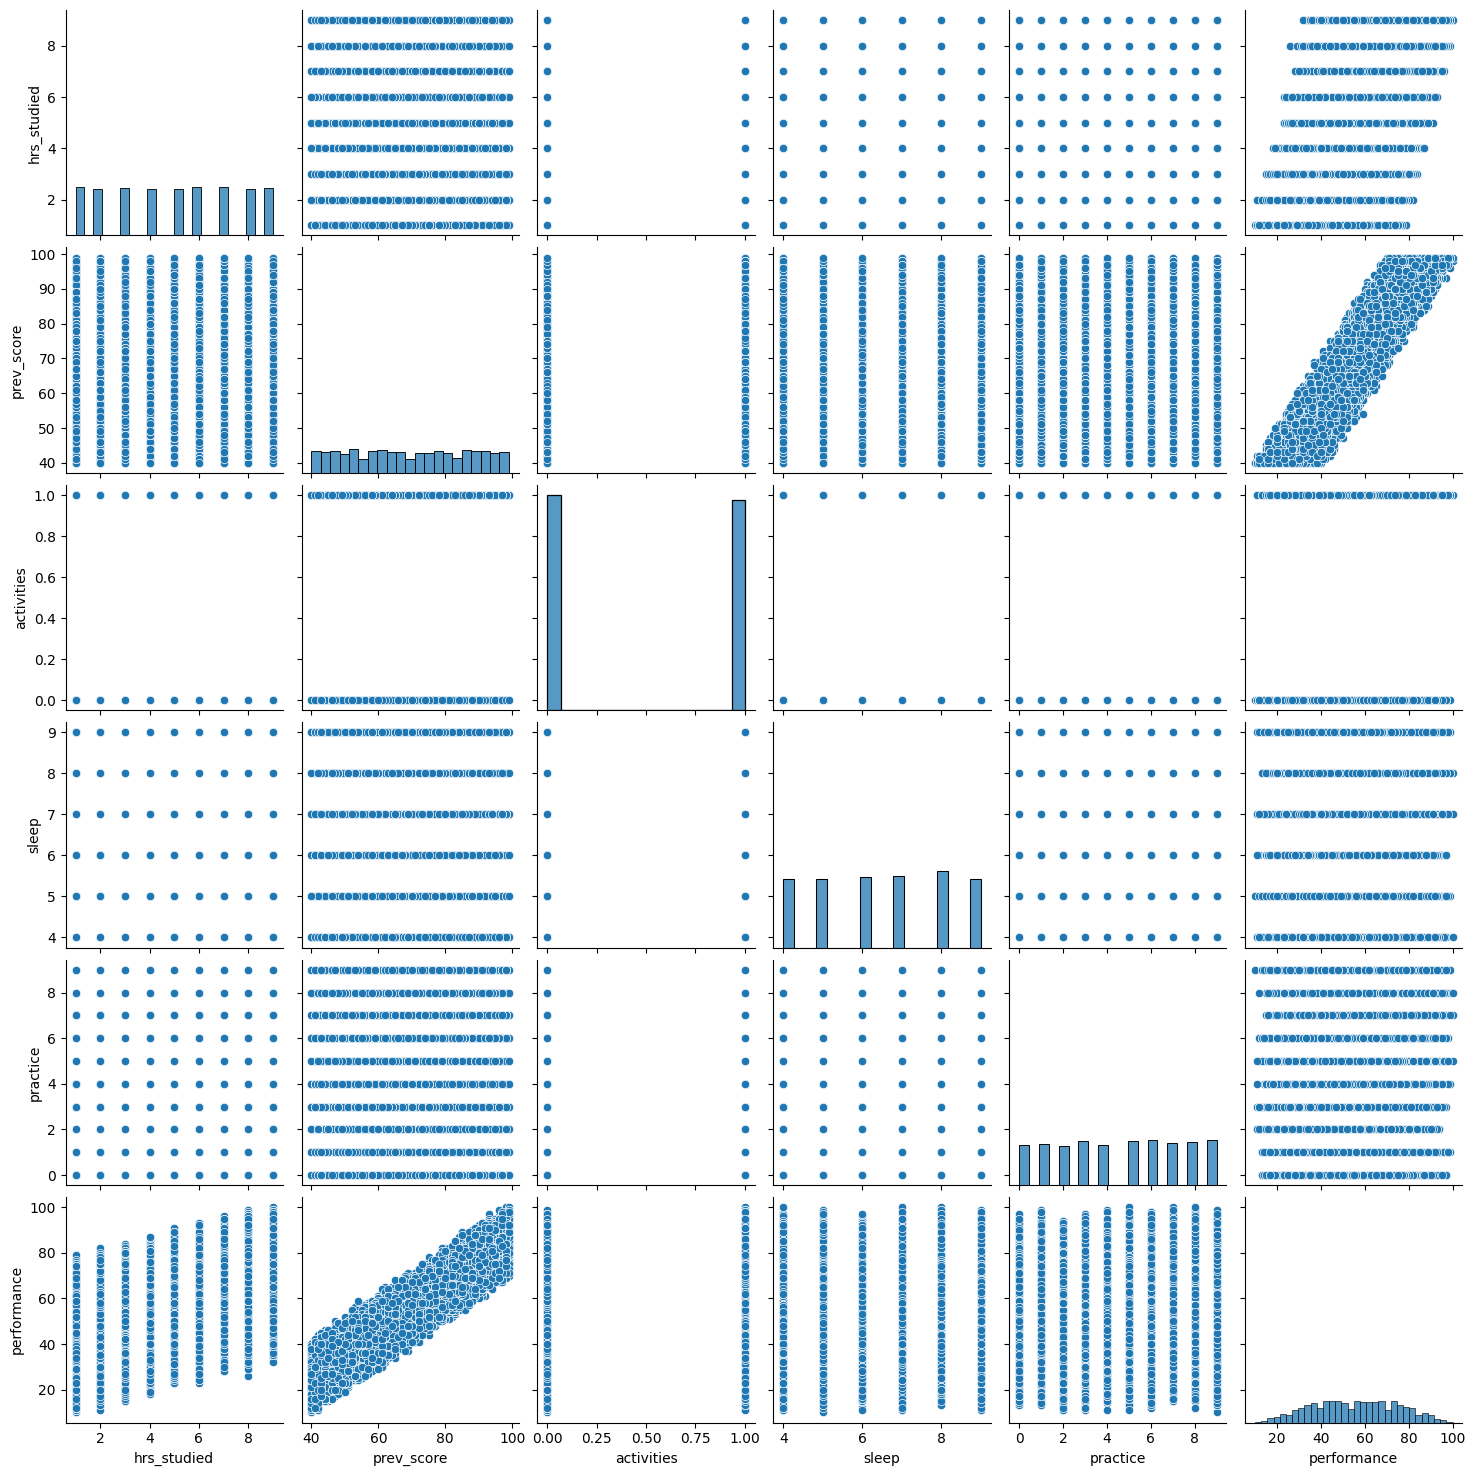

In [102]:
import seaborn as sns

corr_matrix = data.corr()
sns.heatmap(corr_matrix,annot=True)
sns.pairplot(data)

In [104]:
from sklearn.model_selection import train_test_split

X_df = data.drop("performance", axis=1)
Y_df = data["performance"]

X_train, X_test, Y_train, Y_test = train_test_split(X_df,Y_df, test_size=0.3, shuffle=True)


In [ ]:
!pip install statsmodels 

In [105]:
import statsmodels.api as sm


model = sm.OLS(Y_train, X_train)
model_fit = model.fit()

print(model_fit.summary())

Y_pred = model_fit.predict(X_test)



                                 OLS Regression Results                                
Dep. Variable:            performance   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.384e+05
Date:                Tue, 10 Dec 2024   Prob (F-statistic):                        0.00
Time:                        03:53:57   Log-Likelihood:                         -22296.
No. Observations:                7000   AIC:                                  4.460e+04
Df Residuals:                    6995   BIC:                                  4.464e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

Text(0, 0.5, 'Predicted Age (years)')

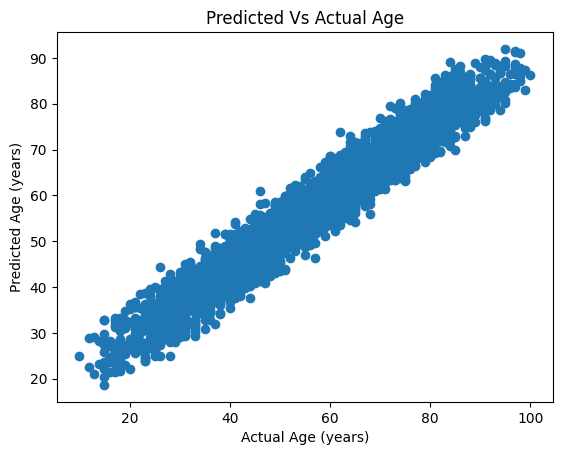

In [106]:
import matplotlib.pyplot as plt

plt.scatter(Y_test,Y_pred)
plt.title("Predicted Vs Actual Age")
plt.xlabel("Actual Age (years)")
plt.ylabel("Predicted Age (years)")

## Feature Importance

## Dimensionality Reduction

Dimensionality reduction is a fundamental technique in data processing and machine learning that involves reducing the number of input variables or features in a dataset. The primary goals of dimensionality reduction are to simplify the dataset, speed up computation, and improve the performance of machine learning models. There are two main types of dimensionality reduction: feature selection and feature extraction.

### Feature Selection
Feature selection involves selecting a subset of the most important features from the original dataset. The key idea is to identify and retain only those features that contribute most significantly to the prediction variable or output in which you are interested. This approach can be done through various methods such as:

- **Filter methods**: These methods apply a statistical measure to assign a scoring to each feature; features are ranked by the score and either the top features are selected, or those below a certain threshold are removed.

- **Wrapper methods**: These methods consider the selection of a set of features as a search problem, where different combinations are prepared, evaluated, and compared to other combinations. A predictive model is used to evaluate a combination of features and assign a score based on model accuracy.

- **Embedded methods**: These methods perform feature selection as part of the model construction process. The most common methods are regularization methods like LASSO (Least Absolute Shrinkage and Selection Operator) that penalize the model for having too many variables.

### Feature Extraction

Feature extraction transforms the data in the high-dimensional space to a space of fewer dimensions. The data transformation may be linear, as in **Principal Component Analysis (PCA)**, or non-linear, as in **t-Distributed Stochastic Neighbor Embedding (t-SNE)**. The key idea is to preserve as much of the significant information as possible while reducing the dimensionality of the data. This is achieved through various techniques such as:

- **Principal Component Analysis (PCA):** PCA is a statistical procedure that uses orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. The first principal component has the largest possible variance, and each succeeding component, in turn, has the highest variance possible under the constraint that it is orthogonal to the preceding components.
  
- **t-Distributed Stochastic Neighbor Embedding (t-SNE):** t-SNE is a non-linear technique particularly well suited for the visualization of high-dimensional datasets. It converts similarities between data points to joint probabilities and tries to minimize the Kullback–Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.
  
- **Autoencoders:** Autoencoders are a type of artificial neural network used to learn efficient codings of unlabeled data. The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for dimensionality reduction, by training the network to ignore signal "noise".


## Examples of High Dimensional Data
High-dimensional data refers to datasets with a large number of features (or dimensions) relative to the number of observations. Such data can be challenging to analyze and visualize due to the complexity and the "curse of dimensionality." Here are some examples of high-dimensional data:

1. **Genomic Data**: Genomic datasets often contain information on thousands to millions of genetic variants (like SNPs - Single Nucleotide Polymorphisms) across numerous individuals. Each genetic variant can be considered a dimension in the dataset.

2. **Image Data**: In image processing, each pixel can be considered a feature or dimension. For example, a 100x100 pixel grayscale image has 10,000 dimensions, and if the image is in color (RGB), the dimensionality triples to 30,000 because each pixel has three color channels.

3. **Text Data**: In natural language processing (NLP), text documents are often represented using models like TF-IDF (Term Frequency-Inverse Document Frequency) or word embeddings, where each unique word or token in the corpus can be a dimension. Large text corpora can thus lead to very high-dimensional feature spaces.

4. **Financial Data**: Financial datasets can include a wide range of indicators, market indices, stock prices, trading volumes, and other economic factors for thousands of companies over multiple time points, leading to high-dimensional datasets.

5. **Sensor Data**: In fields like IoT (Internet of Things), sensor networks can generate data from numerous sensors (temperature, humidity, pressure, motion, etc.) collected over time, each sensor contributing to the dimensionality of the dataset.

6. **Social Network Data**: Data from social networks can be high-dimensional, considering the numerous features that can be extracted from user profiles, their connections, interactions, posts, likes, and comments.

7. **Medical Imaging Data**: Medical images, such as those from MRI, CT scans, or PET scans, contain information across three dimensions (and sometimes time, adding a fourth dimension), with each voxel (3D pixel) representing a feature.

8. **Consumer Behavior Data**: Datasets capturing consumer behavior, including purchase history, browsing patterns, product reviews, and demographic information, can become high-dimensional when analyzing a large number of products and consumer interactions.


## Introduction to Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a statistical procedure that transforms a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the highest possible variance (it accounts for as much of the variability in the data as possible), and each succeeding component, in turn, has the highest variance possible under the constraint that it is orthogonal to (i.e., uncorrelated with) the preceding components.

The main goals of PCA are to:
1. **Reduce Dimensionality**: By converting many possibly correlated variables into a smaller number of uncorrelated variables, PCA simplifies the complexity of high-dimensional data.
2. **Identify Hidden Patterns**: PCA helps to uncover hidden patterns in the data by highlighting the directions where the data varies the most.
3. **Visualize High-Dimensional Data**: By reducing the dimensionality, PCA allows for the visualization of high-dimensional data in a 2D or 3D space, making it easier to identify relationships and groupings within the data.

### How PCA Works
PCA involves the following steps:
- **Standardization**: The data is standardized to have a mean of 0 and a standard deviation of 1. This is important because PCA is sensitive to the variances of the initial variables.
- **Covariance Matrix Computation**: The covariance matrix expresses the relationships between the different variables in the dataset.
- **Eigenvalue and Eigenvector Calculation**: Eigenvalues and eigenvectors are computed from the covariance matrix to identify the principal components. Eigenvectors represent the directions of the axes where variance is maximized, and eigenvalues represent the magnitude of variance along those axes.
- **Component Selection**: Principal components are selected based on the magnitude of their eigenvalues. Components with higher eigenvalues carry more information.

PCA is widely used in exploratory data analysis and in making predictive models. It is commonly used as a tool to visualize genetic distance and relatedness between populations, in image compression, and in many areas of science and technology.




### Mathematical Formulation



#### Standardization
First, the data is standardized to have a mean of 0 and standard deviation of 1 for each feature:
$$ z_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j} $$
where $x_{ij}$ is the value of the $j$-th feature for the $i$-th observation, $\bar{x}_j$ is the mean of the $j$-th feature, and $s_j$ is the standard deviation of the $j$-th feature.

#### Covariance Matrix Computation
The covariance matrix $\Sigma$ is computed to understand how the variables of the input data vary together:
$$ \Sigma = \frac{1}{n-1} \mathbf{Z}^T\mathbf{Z} $$
where $\mathbf{Z}$ is the matrix of standardized data and $n$ is the number of observations.

#### Eigenvalue and Eigenvector Calculation
Eigenvalues and eigenvectors of the covariance matrix are computed. The eigenvector $\mathbf{v}$ and eigenvalue $\lambda$ must satisfy:
$$ \Sigma\mathbf{v} = \lambda\mathbf{v} $$
Eigenvectors represent the directions of maximum variance (principal components), and eigenvalues indicate the magnitude of variance in those directions.

#### Component Selection
Principal components are ranked by their corresponding eigenvalues in descending order. To reduce dimensionality, only the first $k$ principal components are selected, where $k$ is chosen based on the desired amount of total variance to retain:
$$ \text{Total Variance Retained} = \frac{\sum_{i=1}^{k} \lambda_i}{\sum_{i=1}^{d} \lambda_i} $$
where $d$ is the total number of original features.

#### Projection onto New Feature Space
Finally, the original data is projected onto the new feature space spanned by the selected principal components to obtain the transformed data matrix $\mathbf{T}$:
$$ \mathbf{T} = \mathbf{Z}\mathbf{V}_{k} $$
where $\mathbf{V}_{k}$ is the matrix containing the first $k$ eigenvectors as columns.

PCA effectively reduces the dimensions of the dataset while preserving the most significant variance, making it easier to analyze, visualize, and use in subsequent machine learning models.


## PCA Examples: Eigenfaces Example with Olivetti Dataset

In this example, we use the Olivetti faces dataset from `sklearn.datasets` to demonstrate the concept of eigenfaces. The dataset consists of 400 images of faces, each with a resolution of 64x64 pixels. We'll apply PCA to extract the principal components, which we refer to as eigenfaces. These eigenfaces capture the most significant variations in the facial images and can be used to reconstruct the original faces.

### Steps:
1. **Load the Olivetti Faces Dataset**: We begin by loading the dataset and preparing the face images.
2. **Apply PCA**: We use PCA to reduce the dimensionality of the face images, preserving the features that account for the most variance.
3. **Visualize Eigenfaces**: The principal components obtained from PCA are the eigenfaces. We visualize the first few eigenfaces to understand the primary features captured by PCA.
4. **Face Reconstruction**: As an optional step, we can demonstrate how original faces can be approximated using a linear combination of the eigenfaces.

By analyzing eigenfaces, we can gain insights into the common features shared across different faces in the dataset, such as the general shape of the head, the eyes, and the mouth positioning.


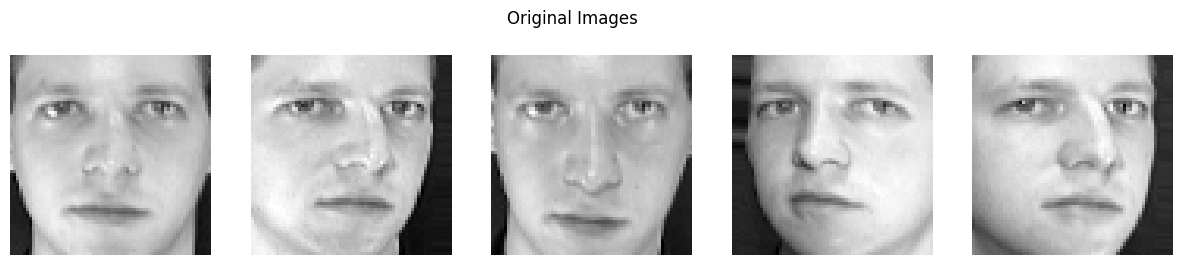

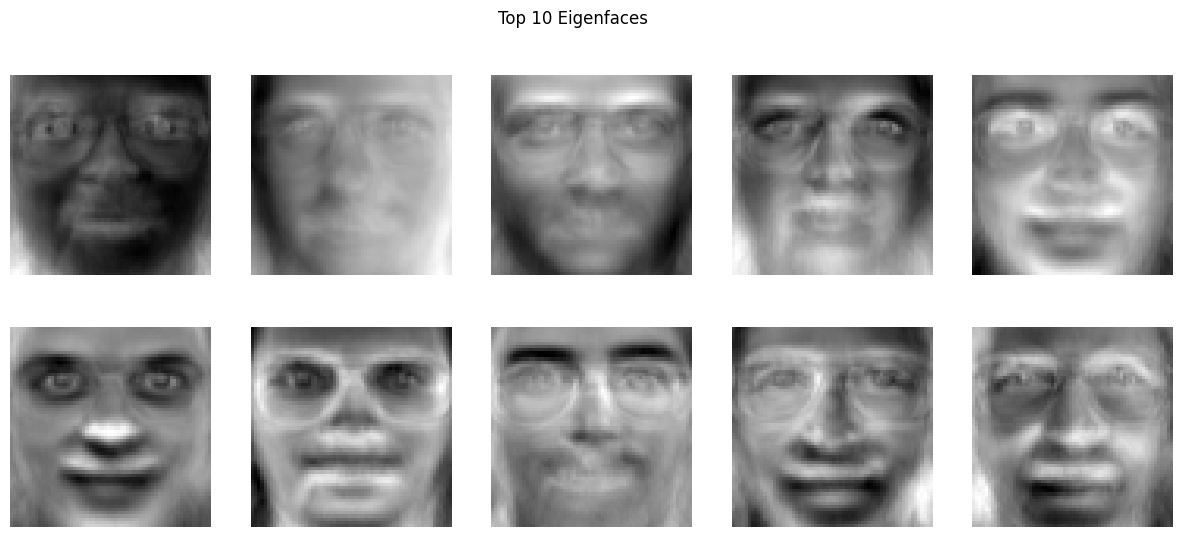

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA

# Load the Olivetti faces dataset
faces_data = fetch_olivetti_faces()
faces = faces_data.images

# Displaying the first 5 images in the dataset
fig, ax = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    ax[i].imshow(faces[i], cmap='gray')
    ax[i].axis('off')
plt.suptitle('Original Images')
plt.show()

# Flatten the images for PCA
n_samples, height, width = faces.shape
X = faces.reshape(n_samples, height*width)

# Applying PCA to find eigenfaces
n_components = 50  # Number of eigenfaces
pca = PCA(n_components=n_components, whiten=True).fit(X)

# Visualize the top 10 eigenfaces
eigenfaces = pca.components_.reshape((n_components, height, width))
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):
    ax[i // 5, i % 5].imshow(eigenfaces[i], cmap='gray')
    ax[i // 5, i % 5].axis('off')
plt.suptitle('Top 10 Eigenfaces')
plt.show()


[[ 6.255078    1.8535006  -1.6507962  -0.38394204  4.741976   -0.21789809
   3.1502595  -3.0914724  -2.816752    0.11117826 -0.18618026  1.8147936
   0.71649045  2.3895688  -0.16137315 -0.70885366 -0.6415583   1.9842235
   0.70787185  0.34018838 -1.5696474   0.5867278  -1.0062625   2.8390398
   0.668451   -1.3496342   1.3254324  -0.66507804 -1.0245774   0.3761386
  -0.11348146 -0.41699067 -1.5822011   1.8609496  -1.4546454  -0.36809096
  -2.2520022  -2.1773152  -0.6359006   1.0688574   1.2866215   0.36586478
   0.7381799   1.2937416  -1.254391   -2.0773835   2.6433654   2.6234298
   2.446146    1.4491947 ]]
Image shape: (64, 64)


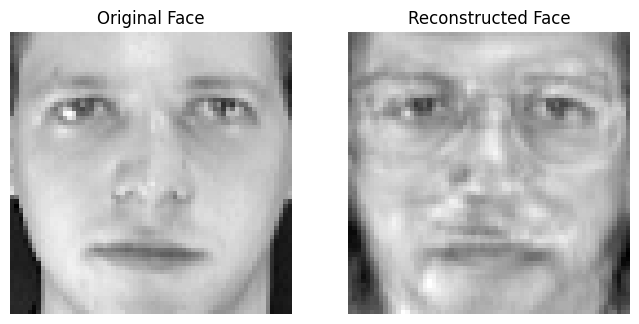

In [11]:
def get_face_vector(face_image, pca, mean_face):
    """
    Project a given face image onto the PCA (eigenface) space to get its vector representation.

    Parameters:
    - face_image: 2D array, the given face image to be transformed.
    - pca: trained PCA model.
    - mean_face: 1D array, the average face calculated from the training set.

    Returns:
    - face_vector: 1D array, the vector representation of the face in the PCA space.
    """

    # Flatten the given face image
    face_flat = face_image.reshape(1, -1)

    # Subtract the mean face
    face_normalized = face_flat - mean_face

    # Use PCA to transform the face into its vector representation
    face_vector = pca.transform(face_normalized)

    return face_vector

def reconstruct_face(face_vector, pca, mean_face, image_shape):
    """
    Reconstruct a face image from its PCA vector representation.

    Parameters:
    - face_vector: 1D array, the PCA vector representation of the face.
    - pca: trained PCA model.
    - mean_face: 1D array, the average face calculated from the training set.
    - image_shape: tuple, the shape (height, width) of the face images.

    Returns:
    - reconstructed_face: 2D array, the reconstructed face image.
    """

    # Inverse transform the PCA vector to get back to the original space
    face_flat_reconstructed = pca.inverse_transform(face_vector)

    # Add the mean face
    face_flat_reconstructed += mean_face

    # Reshape the flat array back to the original image shape
    reconstructed_face = face_flat_reconstructed.reshape(image_shape)

    return reconstructed_face




# Assuming 'pca' is your trained PCA model from the previous code
# and 'mean_face' is the average face of the training set
mean_face = X.mean(axis=0)

# Example: Transforming the first face in the dataset
given_face = faces[0]  # This should be replaced with the new face image you want to transform
given_face_vector = get_face_vector(given_face, pca, mean_face)

# given_face_vector now contains the PCA (eigenface) space representation of the given face
print(given_face_vector)

# Image shape (height and width of the images in the dataset)
image_shape = (height, width)

print("Image shape:", image_shape)

# Reconstructing the face from its PCA vector representation
reconstructed_face = reconstruct_face(given_face_vector, pca, mean_face, image_shape)

# Display the original and reconstructed face for comparison
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(given_face, cmap='gray')
ax[0].title.set_text('Original Face')
ax[0].axis('off')

ax[1].imshow(reconstructed_face, cmap='gray')
ax[1].title.set_text('Reconstructed Face')
ax[1].axis('off')

plt.show()

How could we use eigenfaces and PCA to construct a facial recognition system?

## Neural Networks and How They Work

Neural networks are a foundational element of deep learning, a subset of machine learning inspired by the structure and function of the human brain. These networks are composed of layers of interconnected nodes or "neurons," each capable of performing simple computations. When combined, these neurons can tackle complex problems, from image and speech recognition to natural language processing and beyond. This section of the lesson delves into the fundamentals of neural networks, their architecture, and their operational mechanisms.

### The Basic Components

- **Neurons**: The basic computation units of a neural network, analogous to neurons in the biological brain. Each neuron receives input, processes it, and generates an output.
- **Weights**: Parameters that scale the input to a neuron. They are adjustable and are learned during the training process to minimize the error of the network's predictions.
- **Biases**: Additional parameters that allow the activation function to be shifted. They provide flexibility to the model, enabling it to better fit the data.
- **Activation Functions**: Non-linear functions applied to the weighted sum of inputs to a neuron. Common examples include ReLU (Rectified Linear Unit), Sigmoid, and Tanh. Activation functions introduce non-linearity, allowing neural networks to learn complex patterns.

### How Neural Networks Work

- **Forward Propagation**: The process begins with the input layer, where the network receives the raw input data. This data is then passed through the hidden layers, where each neuron computes a weighted sum of its inputs, adds a bias, and applies an activation function. The final output is generated by the output layer.

- **Loss Function**: This function measures the difference between the network's prediction and the actual target values. Common loss functions include Mean Squared Error (MSE) for regression tasks and Cross-Entropy Loss for classification tasks.

- **Backpropagation**: A key algorithm for training neural networks, backpropagation calculates the gradient of the loss function with respect to each weight and bias by the chain rule, effectively determining how each parameter should be adjusted to minimize the loss.

- **Gradient Descent**: This optimization algorithm iteratively adjusts the weights and biases in the direction that most reduces the loss. Variants like Stochastic Gradient Descent (SGD), Adam, and RMSprop are often used to improve convergence.

### Training a Neural Network
Training involves repeatedly passing a dataset through the network (forward propagation), calculating the loss, and then updating the weights and biases to minimize this loss (backpropagation and gradient descent). This process is performed over many iterations or epochs until the model's performance on a validation set no longer improves, indicating that the network has learned the underlying patterns in the data.

### Neural Network Architectures
There are various neural network architectures designed for specific tasks:

- **Fully Connected (Dense) Networks**: The simplest form of neural networks where each neuron in one layer is connected to every neuron in the next layer.
- **Convolutional Neural Networks (CNNs)**: Specialized for processing grid-like data such as images, using convolutional layers to capture spatial hierarchies.
- **Recurrent Neural Networks (RNNs)**: Designed for sequential data (e.g., time series or text), capable of maintaining information in 'memory' over time.
- **Autoencoders**: Used for unsupervised learning tasks like dimensionality reduction or feature learning, consisting of an encoder and a decoder network.
- **Generative Adversarial Networks (GANs)**: Comprise two networks, a generator and a discriminator, competing against each other to generate new data samples indistinguishable from real ones.


### Simple Classification Example

The Iris dataset is a classic dataset in machine learning and statistics, introduced by the British statistician and biologist Ronald Fisher in 1936. It consists of 150 samples from three species of Iris flowers (Iris setosa, Iris virginica, and Iris versicolor). Each sample has four features: the length and the width of the sepals and petals, in centimeters.


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to a DataFrame for better readability
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display the first 5 rows of the dataset
print("First 5 rows of the Iris dataset:")
print(iris_df.head())

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a MLPClassifier model
# This example uses a neural network with one hidden layer of 100 neurons (default settings)
mlp = MLPClassifier(random_state=42, max_iter=1000)

# Train the model
mlp.fit(X_train_scaled, y_train) # <- backwards propogation and stochastic gradient descent

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Feature scaling is a crucial preprocessing step in the context of neural networks and many other machine learning algorithms. It involves transforming the features in your dataset so they are on a similar scale. The most common methods of feature scaling include normalization (scaling the features to a range) and standardization (scaling the features to have a mean of 0 and a standard deviation of 1).

### Simple Regression Example

This dataset contains information about various houses in Boston, including features like average number of rooms, property tax rate, crime rate, etc., and the target variable is the median value of owner-occupied homes in $1000s.

In [15]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the California housing dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a MLPRegressor model
# This example uses a neural network with two hidden layers, each with 50 neurons
mlp_regressor = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', random_state=42, max_iter=1000)

# Train the model
mlp_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred = mlp_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.2773097920575129
R^2 Score: 0.7883792032394534


### Comparison to Non-Neural Network Models

#### Classification comparison

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
mlp = MLPClassifier(random_state=42, max_iter=1000)
rf = RandomForestClassifier(random_state=42)

# Train models
mlp.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)

# Make predictions
mlp_pred = mlp.predict(X_test_scaled)
rf_pred = rf.predict(X_test)

# Evaluate models
mlp_accuracy = accuracy_score(y_test, mlp_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Print accuracy
print(f"MLPClassifier Accuracy: {mlp_accuracy}")
print(f"RandomForestClassifier Accuracy: {rf_accuracy}")


MLPClassifier Accuracy: 1.0
RandomForestClassifier Accuracy: 1.0


#### Linear Regression Comparison

In [18]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load California housing dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
mlp_reg = MLPRegressor(hidden_layer_sizes=(50, 50), random_state=42, max_iter=1000)
lr = LinearRegression()

# Train models
mlp_reg.fit(X_train_scaled, y_train)
lr.fit(X_train, y_train)

# Make predictions
mlp_reg_pred = mlp_reg.predict(X_test_scaled)
lr_pred = lr.predict(X_test)

# Evaluate models
mlp_reg_mse = mean_squared_error(y_test, mlp_reg_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

# Print MSE
print(f"MLPRegressor Mean Squared Error: {mlp_reg_mse}")
print(f"LinearRegression Mean Squared Error: {lr_mse}")


MLPRegressor R² Score: 0.7884
LinearRegression R² Score: 0.5758


#### Multi-Layer Perceptron (MLP) Overview

- **Layers**: MLPs consist of an input layer, one or more hidden layers, and an output layer. Each layer, except for the input layer, is made up of neurons (or nodes).
- **Neurons**: Neurons in each layer are fully connected to the neurons in the subsequent layer, meaning every neuron in one layer connects to every neuron in the next layer.
- **Weights and Biases**: Each connection between neurons has an associated weight, and each neuron (except those in the input layer) has a bias. These weights and biases are the parameters that the network learns during the training process.
- **Activation Functions**: Neurons in hidden and output layers apply a non-linear activation function to their net input (the weighted sum of their inputs plus their bias). Common activation functions include ReLU (Rectified Linear Unit), sigmoid, and tanh. The choice of activation function affects the network's ability to learn complex patterns.

##### MLPClassifier

- **Purpose**: MLPClassifier is designed for classification tasks, where the goal is to assign input samples to one of several categories.
- **Output Layer**: In classification tasks, the output layer typically has one neuron per class and uses a softmax activation function for multi-class classification to produce probabilities of class membership.
- **Loss Function**: The cross-entropy loss function is commonly used, which measures the difference between the predicted probabilities and the actual class labels.

##### MLPRegressor

- **Purpose**: MLPRegressor is used for regression tasks, where the goal is to predict a continuous value based on input features.
- **Output Layer**: In regression tasks, the output layer usually has a single neuron for single-target regression (or one neuron per target variable for multi-target regression) and often uses linear or identity activation function, meaning the net input to the output neuron is directly outputted.
- **Loss Function**: Mean squared error (MSE) is a typical loss function for regression, measuring the average squared difference between predicted values and actual values.


### Activation Functions
Activation functions play a crucial role in neural networks by introducing non-linear properties to the network, enabling it to learn complex data patterns and perform tasks beyond mere linear regression. Without activation functions, a neural network, regardless of how many layers it has, would behave just like a single-layer perceptron (linear classifier), limiting its ability to solve only linearly separable problems.

#### Common Activation Functions

- **Sigmoid**: Historically popular, it outputs values between 0 and 1. While it's useful for binary classification, it's less used in hidden layers of deep networks due to its vanishing gradient problem, where gradients become very small, impeding effective learning in deeper layers.

- **Hyperbolic Tangent (tanh)**: Similar to the sigmoid but outputs values between -1 and 1. It is zero-centered, making it a better choice in some cases, although it still suffers from the vanishing gradient problem.

- **Rectified Linear Unit (ReLU)**: Currently the most widely used activation function for hidden layers. It outputs the input directly if it's positive; otherwise, it outputs zero. ReLU helps with the vanishing gradient problem, enabling training of deeper networks, but it has to be used carefully due to the "dying ReLU" problem, where neurons can become inactive and stop contributing to the learning process.

- **Leaky ReLU and Parametric ReLU (PReLU)**: Variants of ReLU designed to address the dying ReLU problem by allowing a small, positive gradient when the unit is not active.

- **Softmax**: Often used in the output layer for multi-class classification problems. It converts logits (raw predictions) into probabilities by taking the exponential of each output and then normalizing these values by dividing by the sum of all the exponentials.


### Image Classification Example Using Pytorch

In [1]:
!pip install torch torchvision


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Step 2: Load and Prepare the MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Step 3: Define the CNN Model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
        self.fc1 = nn.Linear(1024, 128)  # 4*4*64
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 1024)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Step 4: Initialize the Model, Optimizer, and Loss Function
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Step 5: Train the Model
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

# Training the network
epochs = 5  # You can adjust the number of epochs
for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)

# Step 6: Test the Model
def test(model, device, test_loader):
    model.eval()  # Set the model to evaluation mode
    test_loss = 0
    correct = 0
    with torch.no_grad():  # No need to track gradients for testing
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()  # Sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

# Testing the network
test(model, device, test_loader)



Train Epoch: 1 [0/60000 (0%)]	Loss: 2.310776
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.134528
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.113726
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.074052
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.081151
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.079957
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.068817
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.035864
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.058251
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.012323
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.018263
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.019269
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.021223
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.026340
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.026518
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.107612
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.076360
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.058006
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.093810
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.005535
Train Epoch: